In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory 
import matplotlib.pyplot as plt
import os
import shutil
import random
import glob

In [18]:
#Instanciation de datagenrator qui permet de créer l'augmentation des images
datagenerator = ImageDataGenerator(
        rotation_range=120,         #une rotation aléatoire entre 0 et 40 degré
        width_shift_range=0.3,      #déplacement latéral aléatoire de l'image
        height_shift_range=0.3,     #déplacement vertical aléatoire de l'image
        zoom_range=0.3,             #zoome aléatoire de l'image d'une valeur entre 0 et 40%
        horizontal_flip=True,       #inversement horisontal de l'image
        vertical_flip=True,         #inversement vertical de l'image
        brightness_range=(0.5,1.5), #changement de la luminance de l'image
        fill_mode='nearest')  

##### dans la premiere essai d'augmenter les images j'ai constater que certaines images ont bloqué l'execution de code donc il faut les identifier et supprimer 

In [62]:
def ImageProbleme(path):
    '''
    ImageProbleme permet d'identifier les images qui provoque des erreurs
    
    inputs:
    path -- le repertoire qui contient les images 
    
    outputs: 
    les noms des images (string)
    '''
    import PIL
    from pathlib import Path
    from PIL import UnidentifiedImageError

    path = Path(path).rglob("*.jpg")
    for img_p in path:
        try:
            img = PIL.Image.open(img_p)
        except PIL.UnidentifiedImageError:
            print(img_p)

In [61]:
ImageProbleme("C:/stage_data_inception/data collection/origdata/f")
ImageProbleme("C:/stage_data_inception/data collection/origdata/r")

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [23]:
for i, one_class in enumerate(os.listdir('C:/stage_data_inception/data collection/augdata')): #parcourir tout les classes dans le dossier 
        j = 0
        for batch in datagenerator.flow_from_directory(
                            directory='C:/stage_data_inception/data collection/origdata',                 #le dossier source
                            batch_size=1,
                            class_mode = 'binary',                                                        #2 classes
                            classes = [one_class],                                                        #spécification des classes
                            save_to_dir=f'C:/stage_data_inception/data collection/augdata/{one_class}',   #dossier destination                   
                            save_format='jpg'                                                             #format des images augmentés
        ):
            j += 1               
            if j > 10000:        #par defaut datagenerator est une boucle infinie donc il faut le stopper 
                break

Found 7434 images belonging to 1 classes.


A:\anacondaa\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Found 1089 images belonging to 1 classes.


In [28]:
#calculer le nombre d'images augmentées crées                                                                
print ('le nombre de fichier dans la classe 1 :', len([name for name in os.listdir('C:/stage_data_inception/data collection/augdata/f') if os.path.isfile(os.path.join('C:/stage_data_inception/data collection/augdata/f', name))]))
print ('le nombre de fichier dans la classe 2 :', len([name for name in os.listdir('C:/stage_data_inception/data collection/augdata/r') if os.path.isfile(os.path.join('C:/stage_data_inception/data collection/augdata/r', name))]))

le nombre de fichier dans la classe 1 : 10963
le nombre de fichier dans la classe 2 : 10001


In [34]:
cd "C:/stage_data_inception/data collection/origdata/r"


C:\stage_data_inception\data collection\origdata\r


In [35]:
for file in os.listdir("C:/stage_data_inception/data collection/origdata/r")    :
    shutil.copy(file,"C:/stage_data_inception/data collection/augdata/r")

In [38]:
for file in os.listdir("C:/stage_data_inception/data collection/origdata/f")    :
    shutil.copy(file,"C:/stage_data_inception/data collection/augdata/f")

In [46]:
nbr_faked_image=len([name for name in os.listdir('C:/stage_data_inception/data collection/augdata/f') if os.path.isfile(os.path.join('C:/stage_data_inception/data collection/augdata/f', name))])
nbr_real_image=len([name for name in os.listdir('C:/stage_data_inception/data collection/augdata/r') if os.path.isfile(os.path.join('C:/stage_data_inception/data collection/augdata/r', name))])

In [47]:
#ces deux affichages sert a connaitre le nombres d'images augmentées crées                                                               
print ('le nombre des images falsifiées :',nbr_faked_image)
print ('le nombre des images réels :',nbr_real_image)

le nombre des images falsifiées : 18397
le nombre des images réels : 11090


In [58]:
#creation des dossiers : train,test
os.chdir("C:/stage_data_inception/data collection/final dataset")
if os.path.isdir('train/faked') is False: #condition sur l'existance des dossiers
    os.makedirs('train/faked')
    os.makedirs('train/real')
    os.makedirs('test/faked')
    os.makedirs('test/real')
    

In [59]:
#organisation des images en dossiers : train,valid et test

nbr_images_faked_train= 16397
nbr_images_real_train=9590
nbr_images_faked_test=2000
nbr_images_real_test=1500

os.chdir("C:/stage_data_inception/data collection/augdata/")

for i in random.sample(glob.glob('f/*'),nbr_images_faked_train):           #choisir aléatoirement N images de dossier 'faked'
    shutil.copy(i, 'C:/stage_data_inception/data collection/final dataset/train/faked')                                               #déplacer les images ver le dossier destination 
    
for i in random.sample(glob.glob('r/*'),nbr_images_real_train):     #choisir aléatoirement N images de dossier 'original'
    shutil.copy(i, 'C:/stage_data_inception/data collection/final dataset/train/real')                                            #déplacer les images ver le dossier destination
    
for i in random.sample(glob.glob('f/*'),nbr_images_faked_test):            #choisir aléatoirement N images de dossier 'faked'
    shutil.copy(i, 'C:/stage_data_inception/data collection/final dataset/test/faked')                                                #déplacer les images ver le dossier destination

for i in random.sample(glob.glob('r/*'),nbr_images_real_test):      #choisir aléatoirement N images de dossier 'original'
    shutil.copy(i, 'C:/stage_data_inception/data collection/final dataset/test/real')                                             #déplacer les images ver le dossier destination


In [63]:
#importer train dataset
train_set=image_dataset_from_directory(      
    'C:/stage_data_inception/data collection/final dataset/train',          #dossier source                       
    color_mode='rgb',        #mode de couleurs
    batch_size=32,           #taille de batch
    image_size=(224,224),    #redimensionement des images
    shuffle=True,            #mélanger aléatoirement les images
    seed=1,                  #necessaire si on a validation_split
    subset='validation',     #necessaire si on a validation_split
    validation_split=0.2     #devision de dataset en train et valid
)

#importer test dataset
test_set=image_dataset_from_directory(
    'C:/stage_data_inception/data collection/final dataset/test',
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle=True
)

Found 25987 files belonging to 2 classes.
Using 5197 files for validation.
Found 3500 files belonging to 2 classes.


In [64]:
#prendre un exemple du train_set
im=train_set.take(1)

In [65]:
def plotImage(images):
    
    '''
    plot image permet de visualiser 9 image de la dataset importée 

    inputs :
    images -- instance de image_dataset_from_directory
    '''    

    plt.figure(figsize = (10,10))
    for images, labels in im :
        for i in range(9):
            ax = plt.subplot(3,3,i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.axis("off")


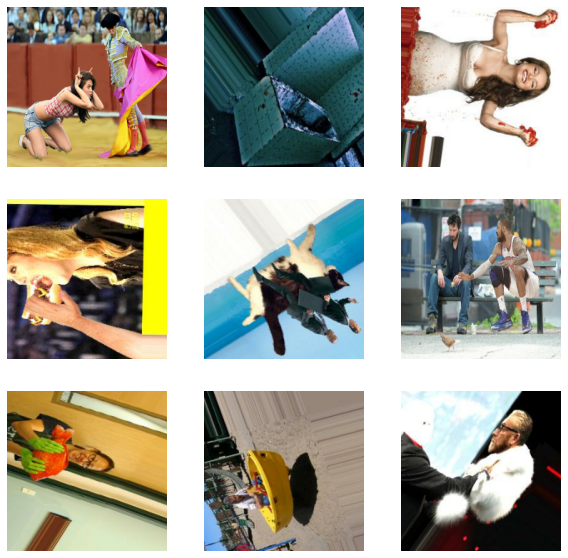

In [66]:
#visualisation des images 
plotImage(im)